## Part 2.0 : Setup

In [24]:
#Importing all the libraries needed for the assignment.

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [25]:
#Update the directory HERE with the directory in which the data file will be stored.

df = pd.read_csv("/content/W23 - heart_modified.csv").sample(frac = 1)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
326,47,M,TA,120,291,ST,155,N,0.0,Flat,1
474,50,M,ATA,140,275,Normal,165,Y,0.0,Up,0
799,66,M,ASY,130,126,Normal,125,N,0.0,Flat,1
17,60,M,ATA,120,246,Normal,110,N,0.0,Up,0
797,65,M,ASY,100,234,Normal,156,N,0.1,Up,1


#Part 2.1 : Data Preprocessing

In [26]:
# Printing the data types of the dataframe to see
# which categorical data will have to be converted into numerical form.
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [27]:
#Changing the data types from Categorical data (Y/N for example) into numerical data (1,0 for example)

Columns_to_change  = ['Sex', 'ChestPainType', 'RestingECG',
       'ExerciseAngina', 'ST_Slope']


df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [28]:
#The mapping dictionnary we have created between categorical data and numerical data
# can be found here.

#Note: a discrepency of 2 can be found between the indices of the samples on the csv and the ones on the pd data frame.
#For example, sample 25 in the csv is sample 23 in the pd.Dataframe
#This is due to the fact that the first line of data in the csv is 2 (the first line of the csv being line [1]
# and being the title line, whereas the pd.Dataframe starts at line [0]).

mapping_dict = {}
for c in Columns_to_change:
  df[c] = df[c].astype('category')
  mapping_dict[c] = dict(enumerate(df[c].cat.categories))


mapping_dict

{'Sex': {0: 'F', 1: 'M'},
 'ChestPainType': {0: 'ASY', 1: 'ATA', 2: 'NAP', 3: 'TA'},
 'RestingECG': {0: 'LVH', 1: 'Normal', 2: 'ST'},
 'ExerciseAngina': {0: 'N', 1: 'Y'},
 'ST_Slope': {0: 'Down', 1: 'Flat', 2: 'Up'}}

In [29]:
#Verifying that we are only changing the columns containing categorical data, not the other ones.

columns = df.select_dtypes(['category']).columns
columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [30]:
# Changing the categorical data into numerical data for all samples.
df[columns] = df[columns].apply(lambda x: x.cat.codes)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
326,47,1,3,120,291,2,155,0,0.0,1,1
474,50,1,1,140,275,1,165,1,0.0,2,0
799,66,1,0,130,126,1,125,0,0.0,1,1
17,60,1,1,120,246,1,110,0,0.0,2,0
797,65,1,0,100,234,1,156,0,0.1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
450,68,1,1,139,283,1,135,0,0.3,2,0
69,62,1,2,170,0,0,123,1,2.5,1,1
896,68,1,0,125,292,2,115,1,0.0,2,0
421,60,0,1,120,221,1,138,0,1.0,2,0


In [31]:
# copy the data
df_min_max_scaled = df.copy()

# apply normalization techniques. This ensures that features with
# different scales contribute equally to model training, preventing dominance by features with larger magnitudes.

for column in df_min_max_scaled.columns:
	df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())


df = df_min_max_scaled
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
326,0.310345,1.0,1.000000,0.600,0.482587,1.0,0.669014,0.0,0.295455,0.5,1.0
474,0.362069,1.0,0.333333,0.700,0.456053,0.5,0.739437,1.0,0.295455,1.0,0.0
799,0.637931,1.0,0.000000,0.650,0.208955,0.5,0.457746,0.0,0.295455,0.5,1.0
17,0.534483,1.0,0.333333,0.600,0.407960,0.5,0.352113,0.0,0.295455,1.0,0.0
797,0.620690,1.0,0.000000,0.500,0.388060,0.5,0.676056,0.0,0.306818,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
450,0.672414,1.0,0.333333,0.695,0.469320,0.5,0.528169,0.0,0.329545,1.0,0.0
69,0.568966,1.0,0.666667,0.850,0.000000,0.0,0.443662,1.0,0.579545,0.5,1.0
896,0.672414,1.0,0.000000,0.625,0.484245,1.0,0.387324,1.0,0.295455,1.0,0.0
421,0.534483,0.0,0.333333,0.600,0.366501,0.5,0.549296,0.0,0.409091,1.0,0.0


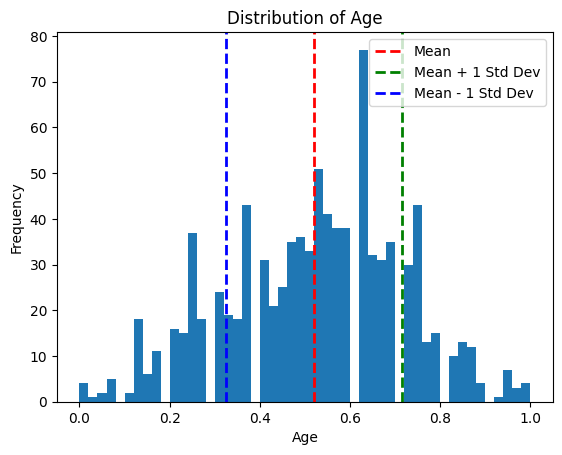

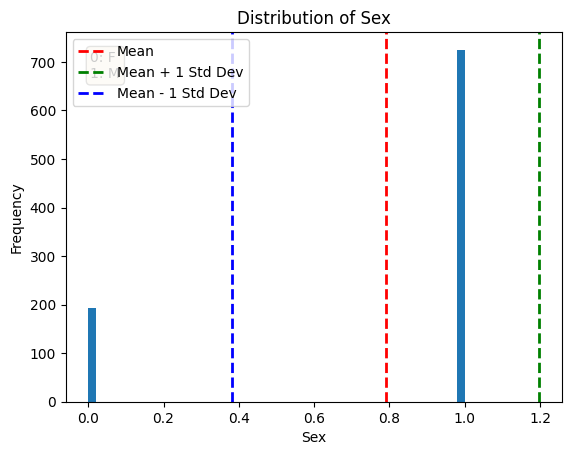

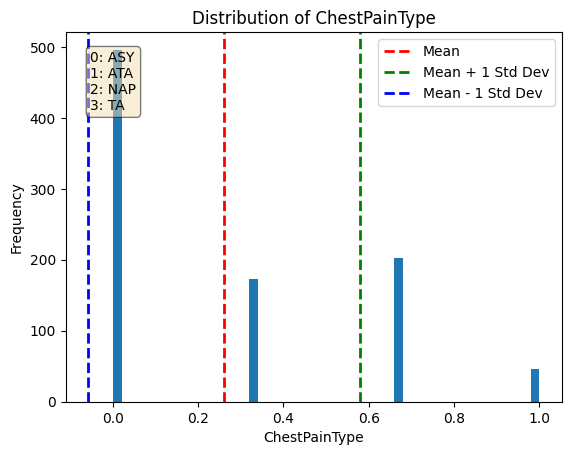

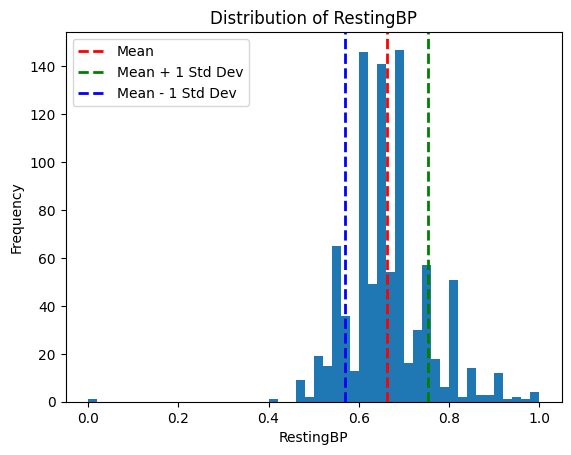

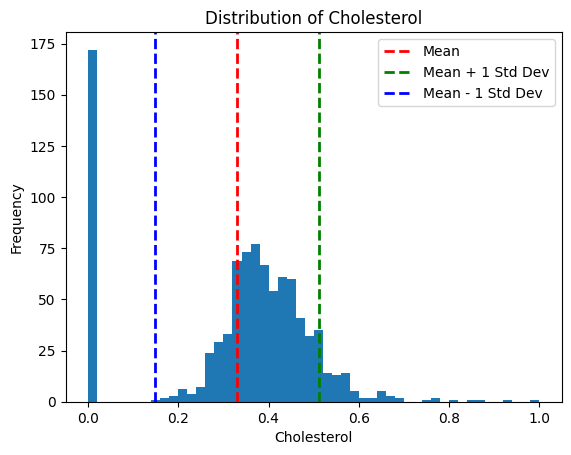

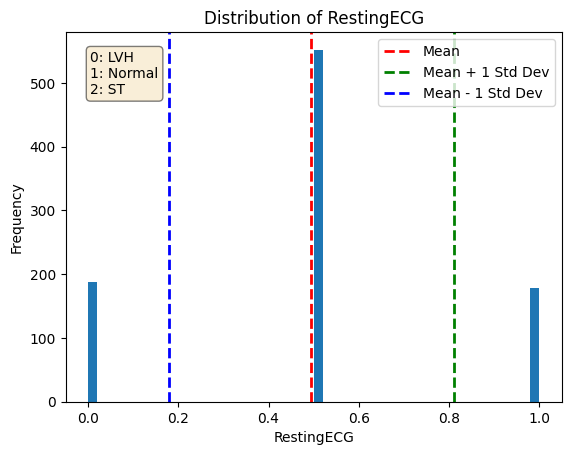

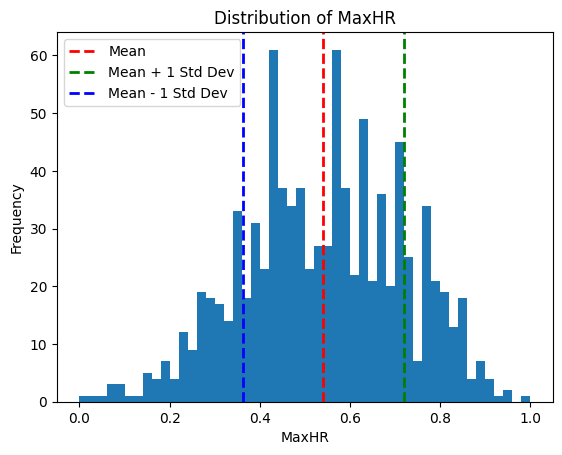

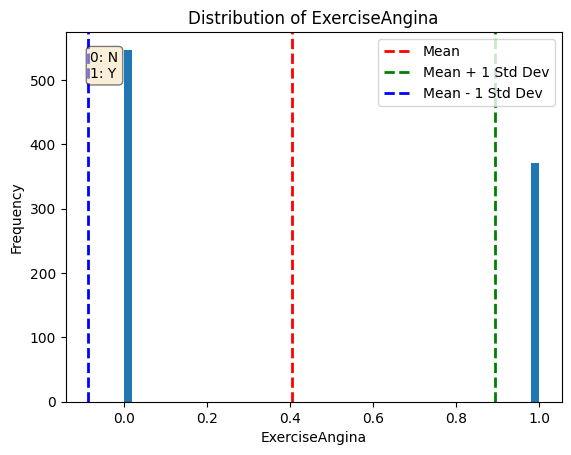

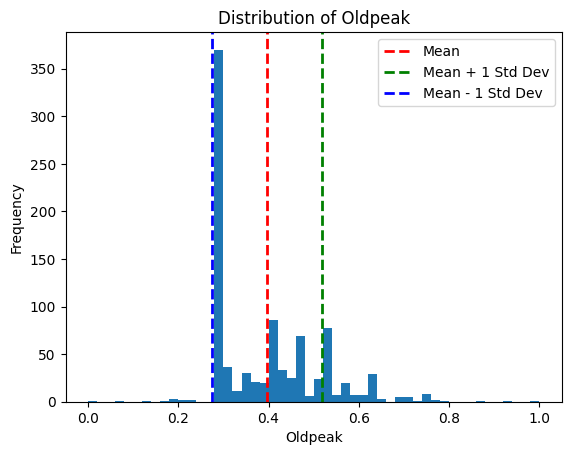

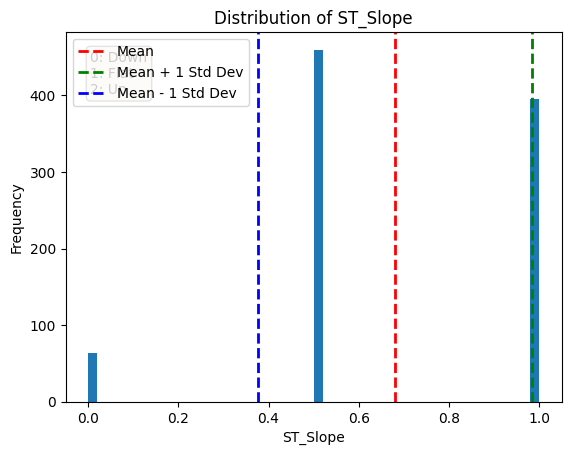

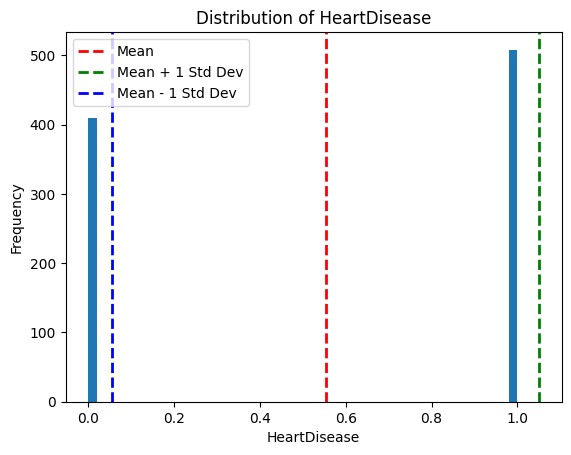

In [32]:

"""
The values (0,1,2,3) have been normalized to fit a [0,1] interval
Therefore, (0,1,2,3) in the data would map to [0, 0.33, 0.66, 1]

The following cell will print the  distribution of each class accross the entire sample space.
In addition to that, we will be displaying some properties of each feature such as
the mean, and the interval of +1 or -1 standard deviation around the mean.
"""

for column in df.columns:
  plt.hist(df[column], bins = 50)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title('Distribution of ' + column)
  legend_elements = []
  if column in Columns_to_change:
    textstr = '\n'.join([f'{key}: {value}' for key, value in mapping_dict[column].items()]
                        )
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10, va = 'top', ha = 'left',
             bbox=props)

  mean_val = np.mean(df[column])
  std_dev = np.std(df[column])
  plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean', )
  plt.axvline(mean_val + std_dev, color='green', linestyle='dashed', linewidth=2, label='Mean + 1 Std Dev')
  plt.axvline(mean_val - std_dev, color='blue', linestyle='dashed', linewidth=2, label='Mean - 1 Std Dev')


  plt.legend()
  plt.show()

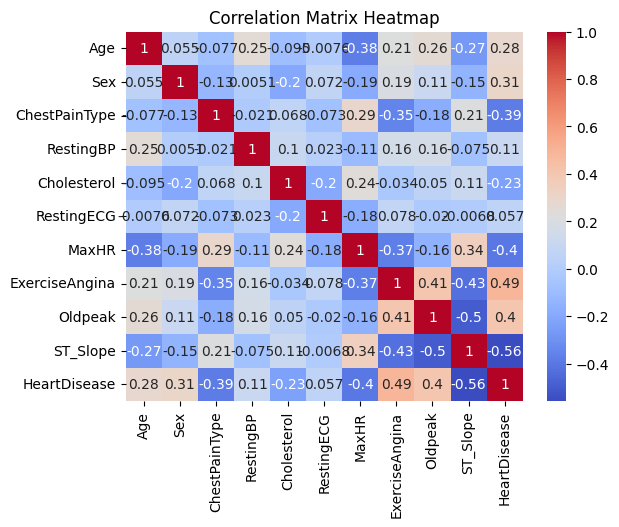

In [33]:
#An analysis of what is a Correlation Matrix can be found in the following cell.
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


The correlation matrix of this dataset illustrates how each feature is related to the others.
It is used to identify patterns, dependencies, and potential multicollinearity in the data.

The diagonal of the correlation matrix obviously shows that each feature is 100% dependant on itself.
From this correlation matrix, one can also observe the following :
- The ExerciseAngina feature seems to be correlated to the HeatDisease diagnostic feature.
- The Oldpea and Exercise Angina features also seem to be correlated.
- It seems as if the ST_Slope feature is not significantly correlated to the Heart Disease feature.
- The rest of the correlation matrix does not depict any clearer trends in terms of correlation


#Part 2.2 : Developping the model

We will here start to build our model. This process starts by seperating our dataset into 3 sets :  a training set, a validation set, and a testing set.
The dataset was chosen to be split following this distribution : 80% of the data allocated for training, 20% for validation

In [47]:
#Spliting the dataset into training and testing.
#It is also important to note that in our case, we are not actually building a prediction from our model
# Therefore, as we are not iterating over some "test" cases, we could also have split our dataset into only 3 sets : training, testing and validation.


X = df.drop('HeartDisease', axis = 1).to_numpy()
y = df['HeartDisease'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

Using Logistic Regression

In [48]:
#Importing the sklearn Logistic Regression model
model = LogisticRegression()

Text(0.5, 1.0, 'Accuracy Score: 0.8429237947122862')

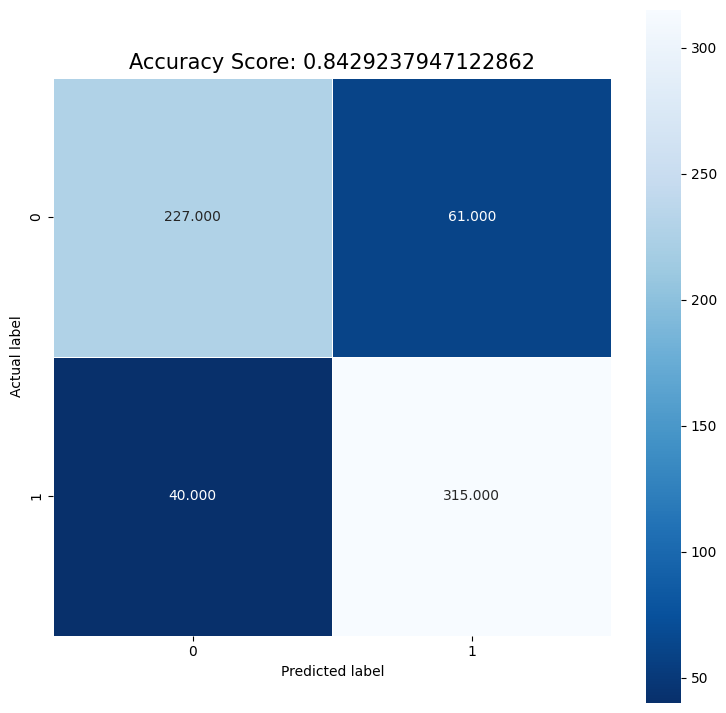

In [49]:
#Fitting the model
model.fit(x_train, y_train)
predictions = model.predict(x_test) #Predicting heart diseases on the test data set
score = model.score(x_test, y_test) #scoring the performance of the model on the test data set
cm = metrics.confusion_matrix(y_test, predictions) #Creating the confusion matrix

#Plotting the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [50]:
#Results using 10 fold cross validation

KFold = 10

scores = cross_val_score((model), X, y, cv=KFold)

for s in range (KFold):
  print(f'The score of the {s} fold is of {scores[s]} ')
print("All in all, we achieved an accuracy of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

The score of the 0 fold is of 0.8152173913043478 
The score of the 1 fold is of 0.8913043478260869 
The score of the 2 fold is of 0.8804347826086957 
The score of the 3 fold is of 0.8043478260869565 
The score of the 4 fold is of 0.8369565217391305 
The score of the 5 fold is of 0.8152173913043478 
The score of the 6 fold is of 0.8478260869565217 
The score of the 7 fold is of 0.8804347826086957 
The score of the 8 fold is of 0.8791208791208791 
The score of the 9 fold is of 0.8571428571428571 
All in all, we achieved an accuracy of 0.85 with a standard deviation of 0.03


In [51]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('The model achieved an accuracy score of: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('The model achieved a precision score of: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('The model achieved a Recall score of: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('The model achieved a F1 score of: %f' % f1)

The model achieved an accuracy score of: 0.842924
The model achieved a precision score of: 0.837766
The model achieved a Recall score of: 0.887324
The model achieved a F1 score of: 0.861833


Using Naive Bayes

In [52]:
#Importing the sklearn NaiveBayes model
model = GaussianNB()

Text(0.5, 1.0, 'Accuracy Score: 0.8491446345256609')

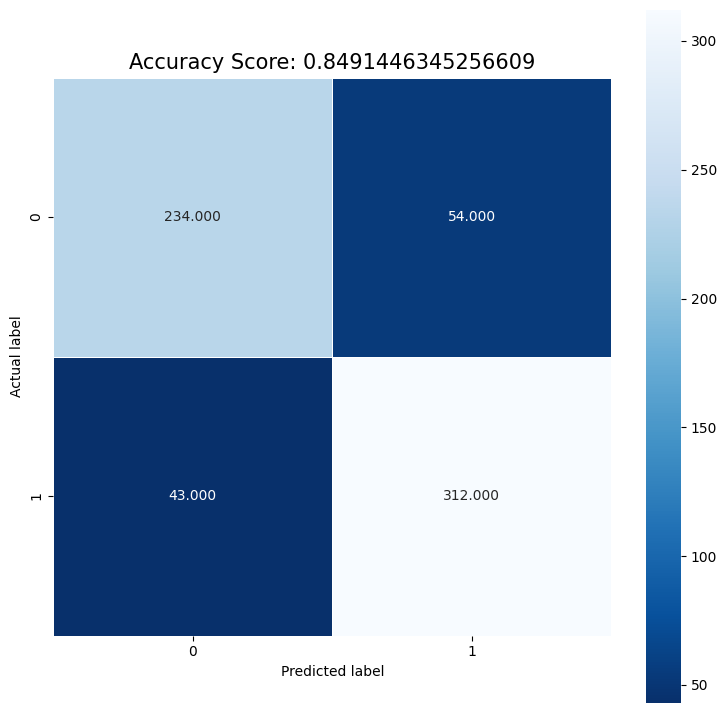

In [53]:
#Fitting the model
model.fit(x_train, y_train)
predictions = model.predict(x_test) #Predicting heart diseases on the test data set
score = model.score(x_test, y_test) #scoring the performance of the model on the test data set
cm = metrics.confusion_matrix(y_test, predictions) #Creating the confusion matrix

#Plotting the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [54]:
#Results using 10 fold cross validation

KFold = 10

scores = cross_val_score((model), X, y, cv=KFold)

for s in range (KFold):
  print(f'The score of the {s} fold is of {scores[s]} ')
print("All in all, we achieved an accuracy of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

The score of the 0 fold is of 0.8260869565217391 
The score of the 1 fold is of 0.8913043478260869 
The score of the 2 fold is of 0.9130434782608695 
The score of the 3 fold is of 0.8043478260869565 
The score of the 4 fold is of 0.8695652173913043 
The score of the 5 fold is of 0.8478260869565217 
The score of the 6 fold is of 0.75 
The score of the 7 fold is of 0.8586956521739131 
The score of the 8 fold is of 0.9120879120879121 
The score of the 9 fold is of 0.8351648351648352 
All in all, we achieved an accuracy of 0.85 with a standard deviation of 0.05


In [55]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('The model achieved an accuracy score of: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('The model achieved a precision score of: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('The model achieved a Recall score of: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('The model achieved a F1 score of: %f' % f1)

The model achieved an accuracy score of: 0.849145
The model achieved a precision score of: 0.852459
The model achieved a Recall score of: 0.878873
The model achieved a F1 score of: 0.865465


Using SVM

In [56]:
#Importing the Sklearn SVM model
model = svm.SVC()

Text(0.5, 1.0, 'Accuracy Score: 0.8444790046656299')

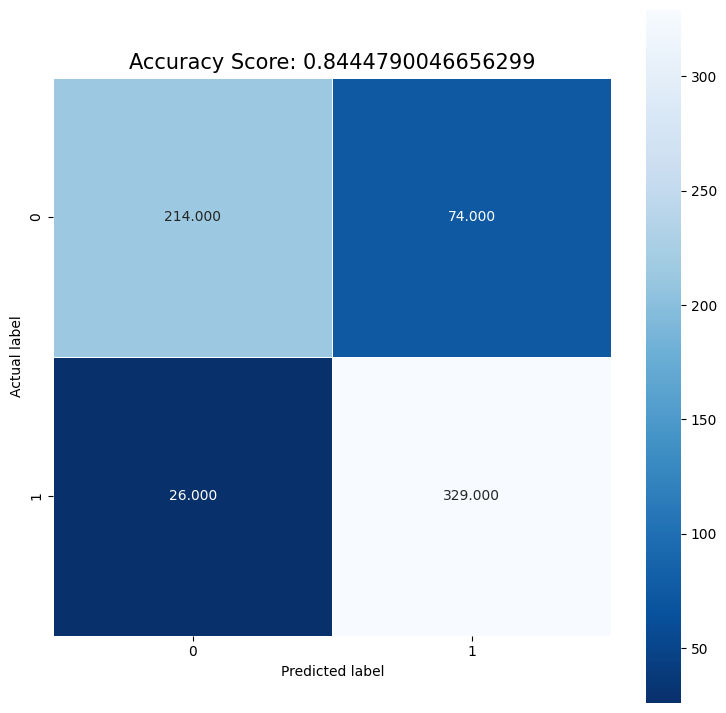

In [57]:
#Fittint the model

model.fit(x_train, y_train)
predictions = model.predict(x_test) #Predicting heart diseases on the test data set
score = model.score(x_test, y_test) #scoring the performance of the model on the test data set
cm = metrics.confusion_matrix(y_test, predictions) #Creating the confusion matrix

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [58]:
#Results using 10 fold cross validation

KFold = 10

scores = cross_val_score((model), X, y, cv=KFold)

for s in range (KFold):
  print(f'The score of the {s} fold is of {scores[s]} ')
print("All in all, we achieved an accuracy of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

The score of the 0 fold is of 0.7934782608695652 
The score of the 1 fold is of 0.8913043478260869 
The score of the 2 fold is of 0.8804347826086957 
The score of the 3 fold is of 0.8260869565217391 
The score of the 4 fold is of 0.8369565217391305 
The score of the 5 fold is of 0.8043478260869565 
The score of the 6 fold is of 0.8804347826086957 
The score of the 7 fold is of 0.8586956521739131 
The score of the 8 fold is of 0.8791208791208791 
The score of the 9 fold is of 0.8681318681318682 
All in all, we achieved an accuracy of 0.85 with a standard deviation of 0.03


In [59]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('The model achieved an accuracy score of: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('The model achieved a precision score of: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('The model achieved a Recall score of: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('The model achieved a F1 score of: %f' % f1)

The model achieved an accuracy score of: 0.844479
The model achieved a precision score of: 0.816377
The model achieved a Recall score of: 0.926761
The model achieved a F1 score of: 0.868074


**Expanding further on the confusion matrix:**

A confusion matrix is a table used in classification to describe the performance of a model by presenting the counts of true positive, true negative, false positive, and false negative predictions, enabling evaluation of accuracy, precision, recall, and other metrics.

Based on their confusion matrices, for all the models we have developped:
- the models performed well in terms of detecting a Heart Disease  when the sample truly had a heart Disease, and in terms of detecting no Heart Disease when there was none
- all in all, the models were more inclined to predict a heart disease when there was none, rather than not detecting a heart disease where there was one.